## Histopathologic Cancer Detection
### Identifying cancer cells in histopathologic scans of lymph node sections

#### INTRODUCTION:
Computer Vision has become an attractive topic in machine learning field. This capability of the computer is playing an important role in medical field towards building an Intelligent Computer Aided Design for fast and accurate identification of tumors, internal scars and other health problems. The main aim of selecting this project is to obtain a base idea of medical image processing. The main idea of this project is to make use of CNN (Convolutional Neural Networks) to analysze and learn from the given training data and perform classification on the test data.

#### DataSet Link:  <a href="https://www.kaggle.com/c/histopathologic-cancer-detection/data"> Link </a>

#### METHOD:

In [22]:
#Importing necessary libraries to create a CNN model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras_preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import *
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, accuracy_score

#### Importing the train and test datas.

In [23]:
#Getting the train and test data.
train_data = pd.read_csv("../content/dataset/train_labels.csv", dtype=str)
test_data = train_data.head(1000)
train_data = train_data.iloc[1000: , :]
train_data.reset_index(drop=True)
train_path = "../content/dataset/train/"
test_path = "../content/dataset/train/"
train_data.id = train_data.id + '.tif'
test_data.id = test_data.id + '.tif'

In [24]:
#Using the ImageDataGenerator to expand the training dataset and to make the model more efficient.
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.20)
test_datagen = ImageDataGenerator(rescale=1/255)

In [25]:
batch = 32
train_steps = 175020 // batch
validate_steps = 43005 // batch
test_steps = 1000 // batch

train_gen = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    directory = train_path,
    x_col = "id",
    y_col = "label",
    subset = "training",
    batch_size = batch,
    shuffle = True,
    class_mode = "categorical",
    target_size = (96, 96))

valid_gen = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    directory = train_path,
    x_col = "id",
    y_col = "label",
    subset = "validation",
    batch_size = batch,
    shuffle = True,
    class_mode = "categorical",
    target_size = (96, 96))

test_gen = test_datagen.flow_from_dataframe(
    dataframe = test_data,
    directory = test_path,
    x_col = "id",
    y_col = None,
    batch_size = batch,
    shuffle = False,
    class_mode = None,
    target_size = (96, 96))

Found 175220 validated image filenames belonging to 2 classes.
Found 43805 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames.


#### Model Summary

In [26]:
np.random.seed(1) #used to make the random numbers predictable

# Initialising the CNN model
model = Sequential()

model.add(Cropping2D(cropping=((32, 32), (32, 32)), input_shape=(96, 96, 3)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))

model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(64, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_1 (Cropping2D)    (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)         

#### Compiling the model

In [27]:
opt = keras.optimizers.Adam(learning_rate=0.00015, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, decay=0.0)

#Compiling the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

hist = model.fit(train_gen, epochs=10, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=validate_steps, verbose=1)

Epoch 1/10
5469/5469 [==============================] - 492s 90ms/step - loss: 0.4965 - accuracy: 0.7662 - val_loss: 0.4351 - val_accuracy: 0.8065
Epoch 2/10
5469/5469 [==============================] - 455s 83ms/step - loss: 0.4297 - accuracy: 0.8072 - val_loss: 0.4221 - val_accuracy: 0.8170
Epoch 3/10
5469/5469 [==============================] - 470s 86ms/step - loss: 0.4098 - accuracy: 0.8180 - val_loss: 0.4104 - val_accuracy: 0.8186
Epoch 4/10
5469/5469 [==============================] - 471s 86ms/step - loss: 0.3968 - accuracy: 0.8254 - val_loss: 0.4004 - val_accuracy: 0.8211
Epoch 5/10
5469/5469 [==============================] - 485s 89ms/step - loss: 0.3843 - accuracy: 0.8310 - val_loss: 0.4048 - val_accuracy: 0.8254
Epoch 6/10
5469/5469 [==============================] - 453s 83ms/step - loss: 0.3739 - accuracy: 0.8376 - val_loss: 0.3667 - val_accuracy: 0.8418
Epoch 7/10
5469/5469 [==============================] - 469s 86ms/step - loss: 0.3653 - accuracy: 0.8419 - val_loss: 0

#### Plotting the accuracy vs epoch and loss vs epoch graphs

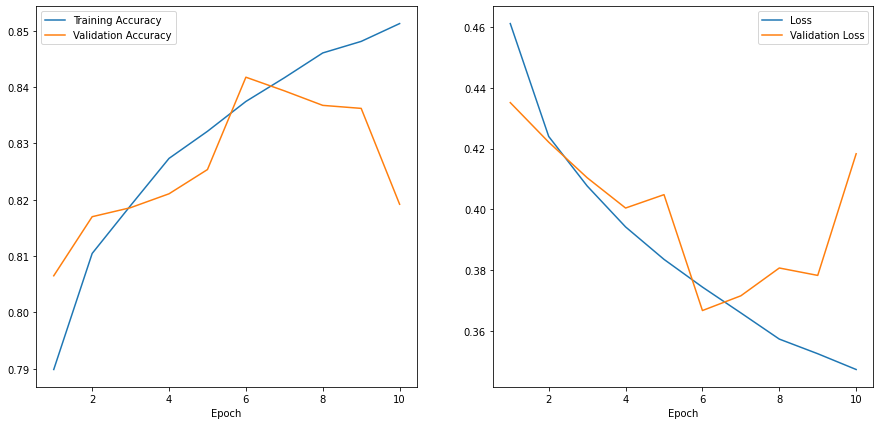

In [28]:
epochs = range(1, len(hist.history['accuracy']) + 1)

plt.figure(figsize=[15, 7])
plt.subplot(1, 2, 1)
plt.plot(epochs, hist.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, hist.history['loss'], label='Loss')
plt.plot(epochs, hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

#### Calculating the accuracy and F1 score for Test Data

In [29]:
test_pred = model.predict(test_gen, steps = test_steps, verbose=1)
pred = np.argmax(test_pred, axis=1)

print("F1-Score:",f1_score(test_data.label.astype(int).iloc[:992], pred))
print("Test Accuracy",accuracy_score(test_data.label.astype(int).iloc[:992], pred))

31/31 [==============================] - 3s 82ms/step
F1-Score: 0.739612188365651
Test Accuracy 0.8104838709677419


#### RESULT:
The accuracy for test data obtained by using CNN model is 81%

The F1 score for test data obtained is 0.73

While designing a model with two convolutional layer we obtained an accuracy of 65%. After adding one more convolutional layer with maxpooling and batch normalization layer we are able to achieve an accuracy of about 81% for test data.

#### DISCUSSION:
By using the CNN model we are able to identify the cancer cells on the image data with an accuracy of around 80%. By utilizing some of the pretrained models to extract features we can increase the accuracy and provide better prediction. For medical imaging UNet based architecture provides better results.

Possible Future works include:

1. Implementing UNet segmentation for better prediction.
2. Training the model for more generalized tumor predictions with different datasets and analyzing its performance.

#### References:
1. https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
2. https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53